In [1]:
# ================================================================================
# Import packages and Data
# ================================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('WAGE2_2024_abridged.csv')

### Preliminary data cleaning

In [2]:
# Print the first 10 observations
data.head(10)

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715383
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
5,1400,40,116,43,16,14,2,35,1,1,0,1,1,2.0,8.0,NaN,7.244227
6,600,40,91,24,10,13,0,30,0,0,0,1,1,2.0,8.0,8.0,6.396930
7,1081,40,114,50,18,8,14,38,1,0,0,1,2,3.0,8.0,NaN,6.985642
8,1154,45,111,37,15,13,1,36,1,0,0,0,2,3.0,14.0,5.0,7.050990
9,1000,40,95,44,12,16,16,36,1,0,0,1,1,1.0,12.0,11.0,6.907755


In [3]:
# Investigate the number of observations and number of columns of the dataset
data.shape

(916, 17)

In [4]:
# Counts the number of missing values in each column 
data.isna().sum() 

wage         0
hours        0
IQ           0
KWW          0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
south        0
urban        0
sibs         0
brthord     80
meduc       74
feduc      185
lwage        0
dtype: int64

In [5]:
# Remove missing values
data.drop(data[data.brthord.isna()].index, inplace = True)
data.drop(data[data.meduc.isna()].index, inplace = True)
data.drop(data[data.feduc.isna()].index, inplace = True)

In [6]:
# Recounts the number of missing values in each column 
data.isna().sum() 

wage       0
hours      0
IQ         0
KWW        0
educ       0
exper      0
tenure     0
age        0
married    0
black      0
south      0
urban      0
sibs       0
brthord    0
meduc      0
feduc      0
lwage      0
dtype: int64

In [35]:
# Inspect the dataset again
data.head(20)

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715383
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
6,600,40,91,24,10,13,0,30,0,0,0,1,1,2.0,8.0,8.0,6.396930
8,1154,45,111,37,15,13,1,36,1,0,0,0,2,3.0,14.0,5.0,7.050990
9,1000,40,95,44,12,16,16,36,1,0,0,1,1,1.0,12.0,11.0,6.907755
10,930,43,132,44,18,8,13,38,1,0,0,0,1,1.0,13.0,14.0,6.835185
13,1318,38,119,24,16,7,2,28,1,0,0,1,3,1.0,10.0,10.0,7.183871
14,1792,40,118,47,16,9,9,34,1,0,0,1,1,1.0,12.0,12.0,7.491087


In [8]:
# ================================================================================
# Splitting training and test sets
# ================================================================================


state=2652020556 

train = data.sample(frac=0.8, random_state=state)
test = data[data.index.isin(train.index)==False].copy() # Only for prediction

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

# Task 1

Conduct a suitable exploratory analysis on this data set that is relevant to the goals
of this study

### Goal 1 and 3 

For the first and third goal of this study, we want to examine 2 relationships: 

1. Years of education and monthly wages 
2. Years of experiences and monthly wages 

First, we examine each variables independently

In [9]:
# Educ: 
data['educ'].describe()

count    655.000000
mean      13.691603
std        2.231175
min        9.000000
25%       12.000000
50%       13.000000
75%       16.000000
max       18.000000
Name: educ, dtype: float64

In [10]:
# Exper: 
data['exper'].describe()

count    655.000000
mean      11.377099
std        4.255570
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: exper, dtype: float64

In [11]:
# Monthly wage: 
data['wage'].describe()

count     655.000000
mean      988.340458
std       407.903098
min       115.000000
25%       699.000000
50%       935.000000
75%      1200.000000
max      3078.000000
Name: wage, dtype: float64

As we can see, the standard deviation of Educ and Exper is not high relative to the mean, suggesting that the data may be approximately symmetrically distributed. However, standard deviation of wage is moderately high relative to the mean, suggesting that there is some variability in the wages of individuals within the dataset, and these variability could be caused by the different years in education and experiences of the observations

Next, we can use boxplots and histograms to examine the distributions of the variables

Text(0.5, 1.0, 'wage')

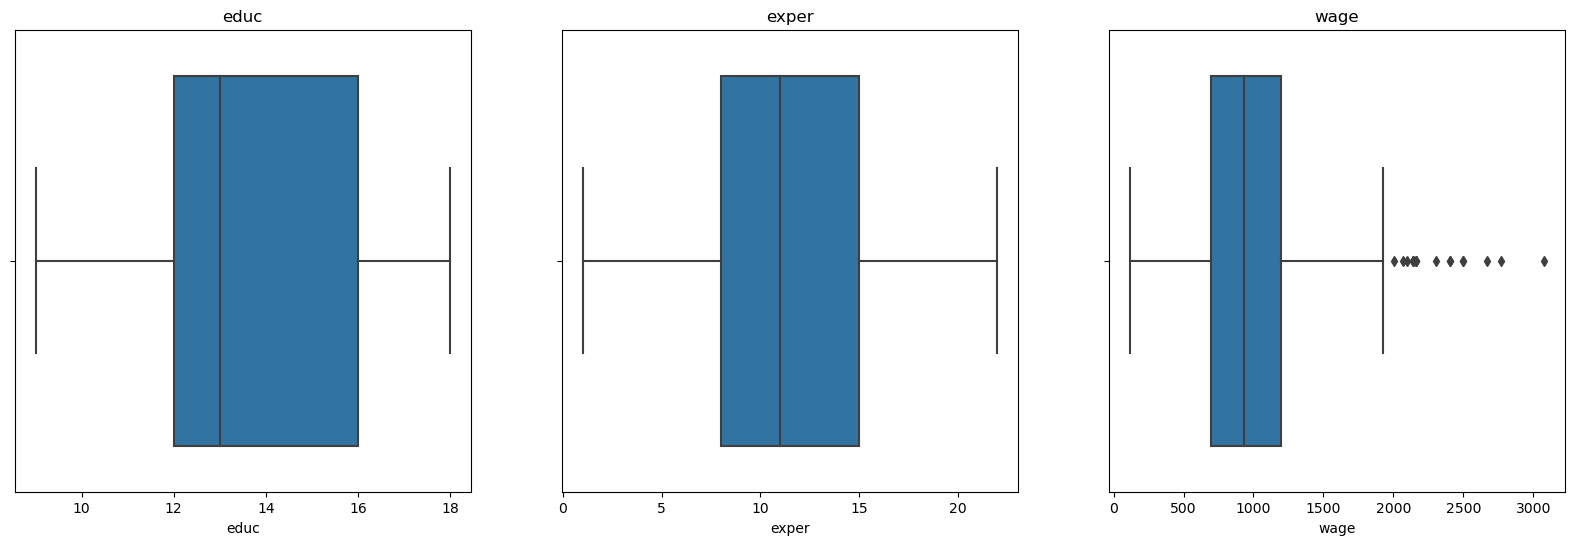

In [12]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(x='educ', data=data)
plt.title('educ')
plt.subplot(1,3,2)
sns.boxplot(x='exper', data=data)
plt.title('exper')
plt.subplot(1,3,3)
sns.boxplot(x='wage', data=data)
plt.title('wage')

Text(0.5, 1.0, 'wage')

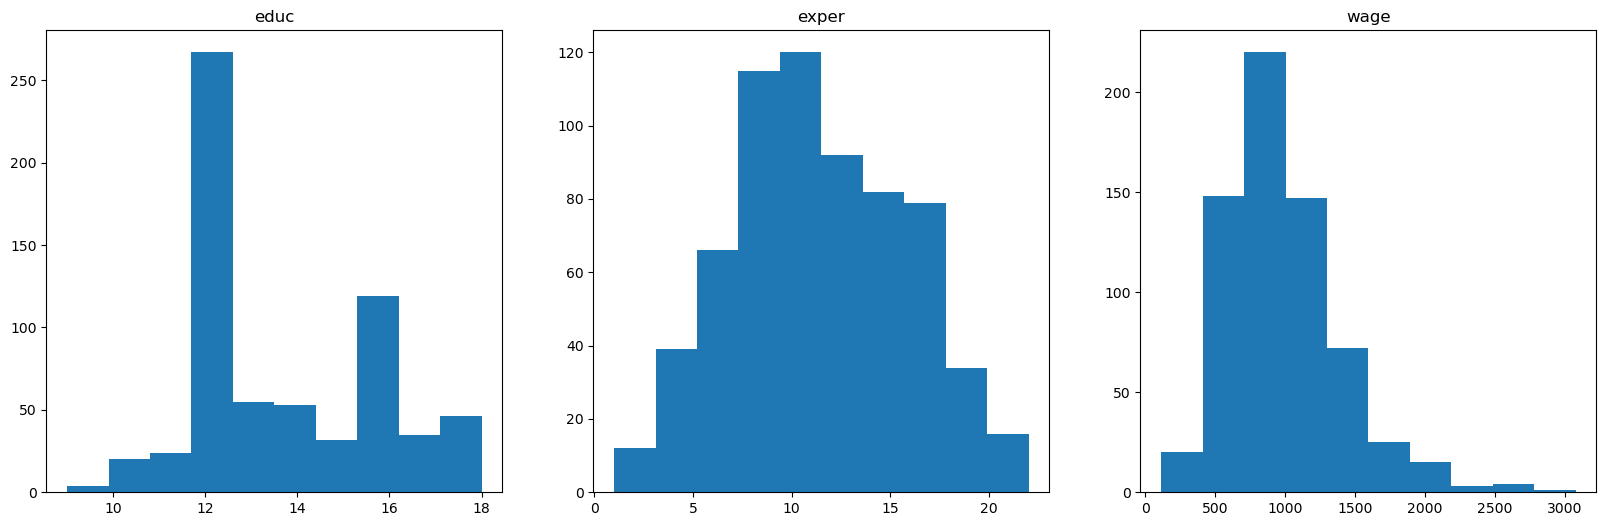

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.hist(x='educ', data=data, bins=10)
plt.title('educ')
plt.subplot(1,3,2)
plt.hist(x='exper', data=data)
plt.title('exper')
plt.subplot(1,3,3)
plt.hist(x='wage', data=data)
plt.title('wage')

With these plots, we can say that the distribution of Exper is close to normal, while the distributions of Educ and Wage tends to skew to the right, representing some degree of outliers. However, there are not many outliers in the variables, according to the boxplots.

We can further use a correlation heat-map to examine the potential relationships between the 3 variables. 

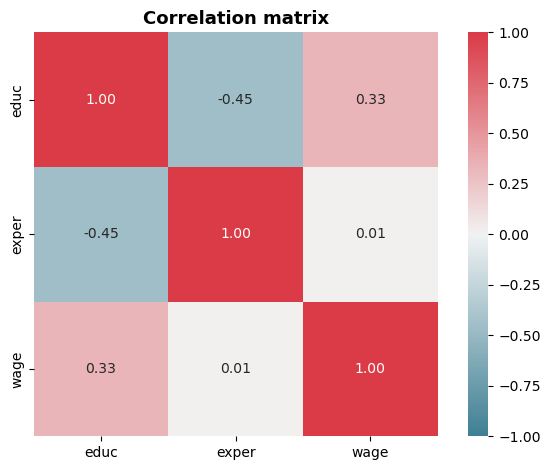

In [36]:
fig, ax = plt.subplots()
variables=['educ','exper','wage']
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[variables].corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap, annot=True, fmt=".2f")
ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()

The correlation heat-map shows some clear relationship between the 3 variables. Educ and exper have moderately negative relationship as an additional year of education would potentially decrease the years of work experiences. Wage and educ shows a positive relationship, while wage and exper shows no relationship, with correlation near to 0. 

The specific correlations between the 3 variables are showed below: 

In [15]:
data[variables].corr().round(2)

,educ,exper,wage
educ,1.00,-0.45,0.33
exper,-0.45,1.00,0.01
wage,0.33,0.01,1.00


Now, we can use a scatterplot matrix to examine the potential relationships between the 3 variables. 

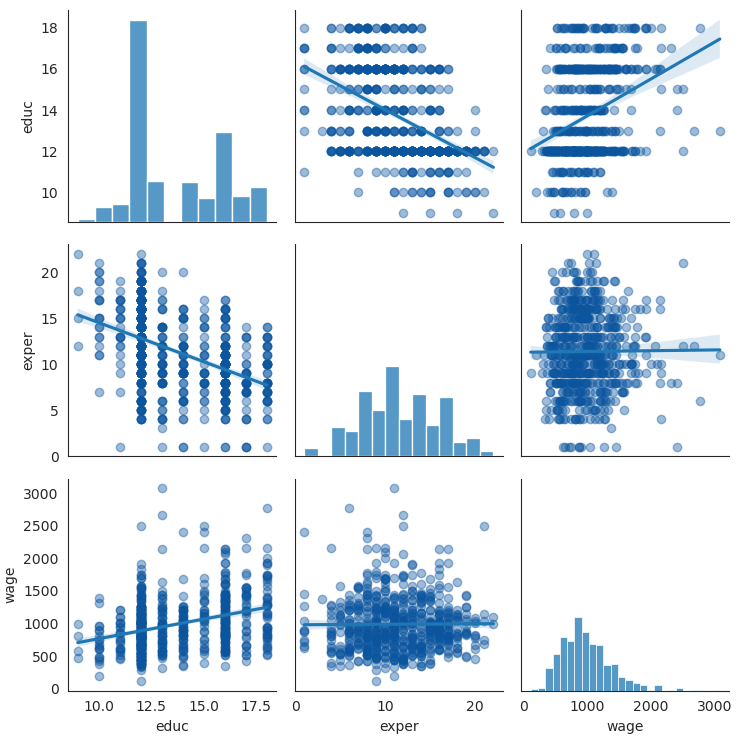

In [16]:
variables=['educ','exper','wage']
with sns.axes_style('white'):
    g=sns.pairplot(data[variables], kind='reg',
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()

Similar to the heat-map, we can see a moderate positive relationship between educ and wage, while exper shows no relationship with wage.

In terms of relationships between the predictors, there is clear negative relationship between exper and educ. However, these correlations are not strong enough to cause multi-collinearity

### Goal 2

For goal number 2, we would conduct exploratory analysis to examine the relationship between the variable wage and other variables in the dataset to include in the optimal model. We again used correlation heat-map and scatterplot matrix to examine the potential relationships of the numerical variables, including Wage, Hours, IQ, KWW, Educ, Exper, Tenure, Age, Meduc, Feduc. We don't include Lwage, as it would have perfect positive relationship with Wage, causing perfect collinearity. 

The categorical and dummy variables are excluded from the analysis are: married, black, south, urban, and brthord

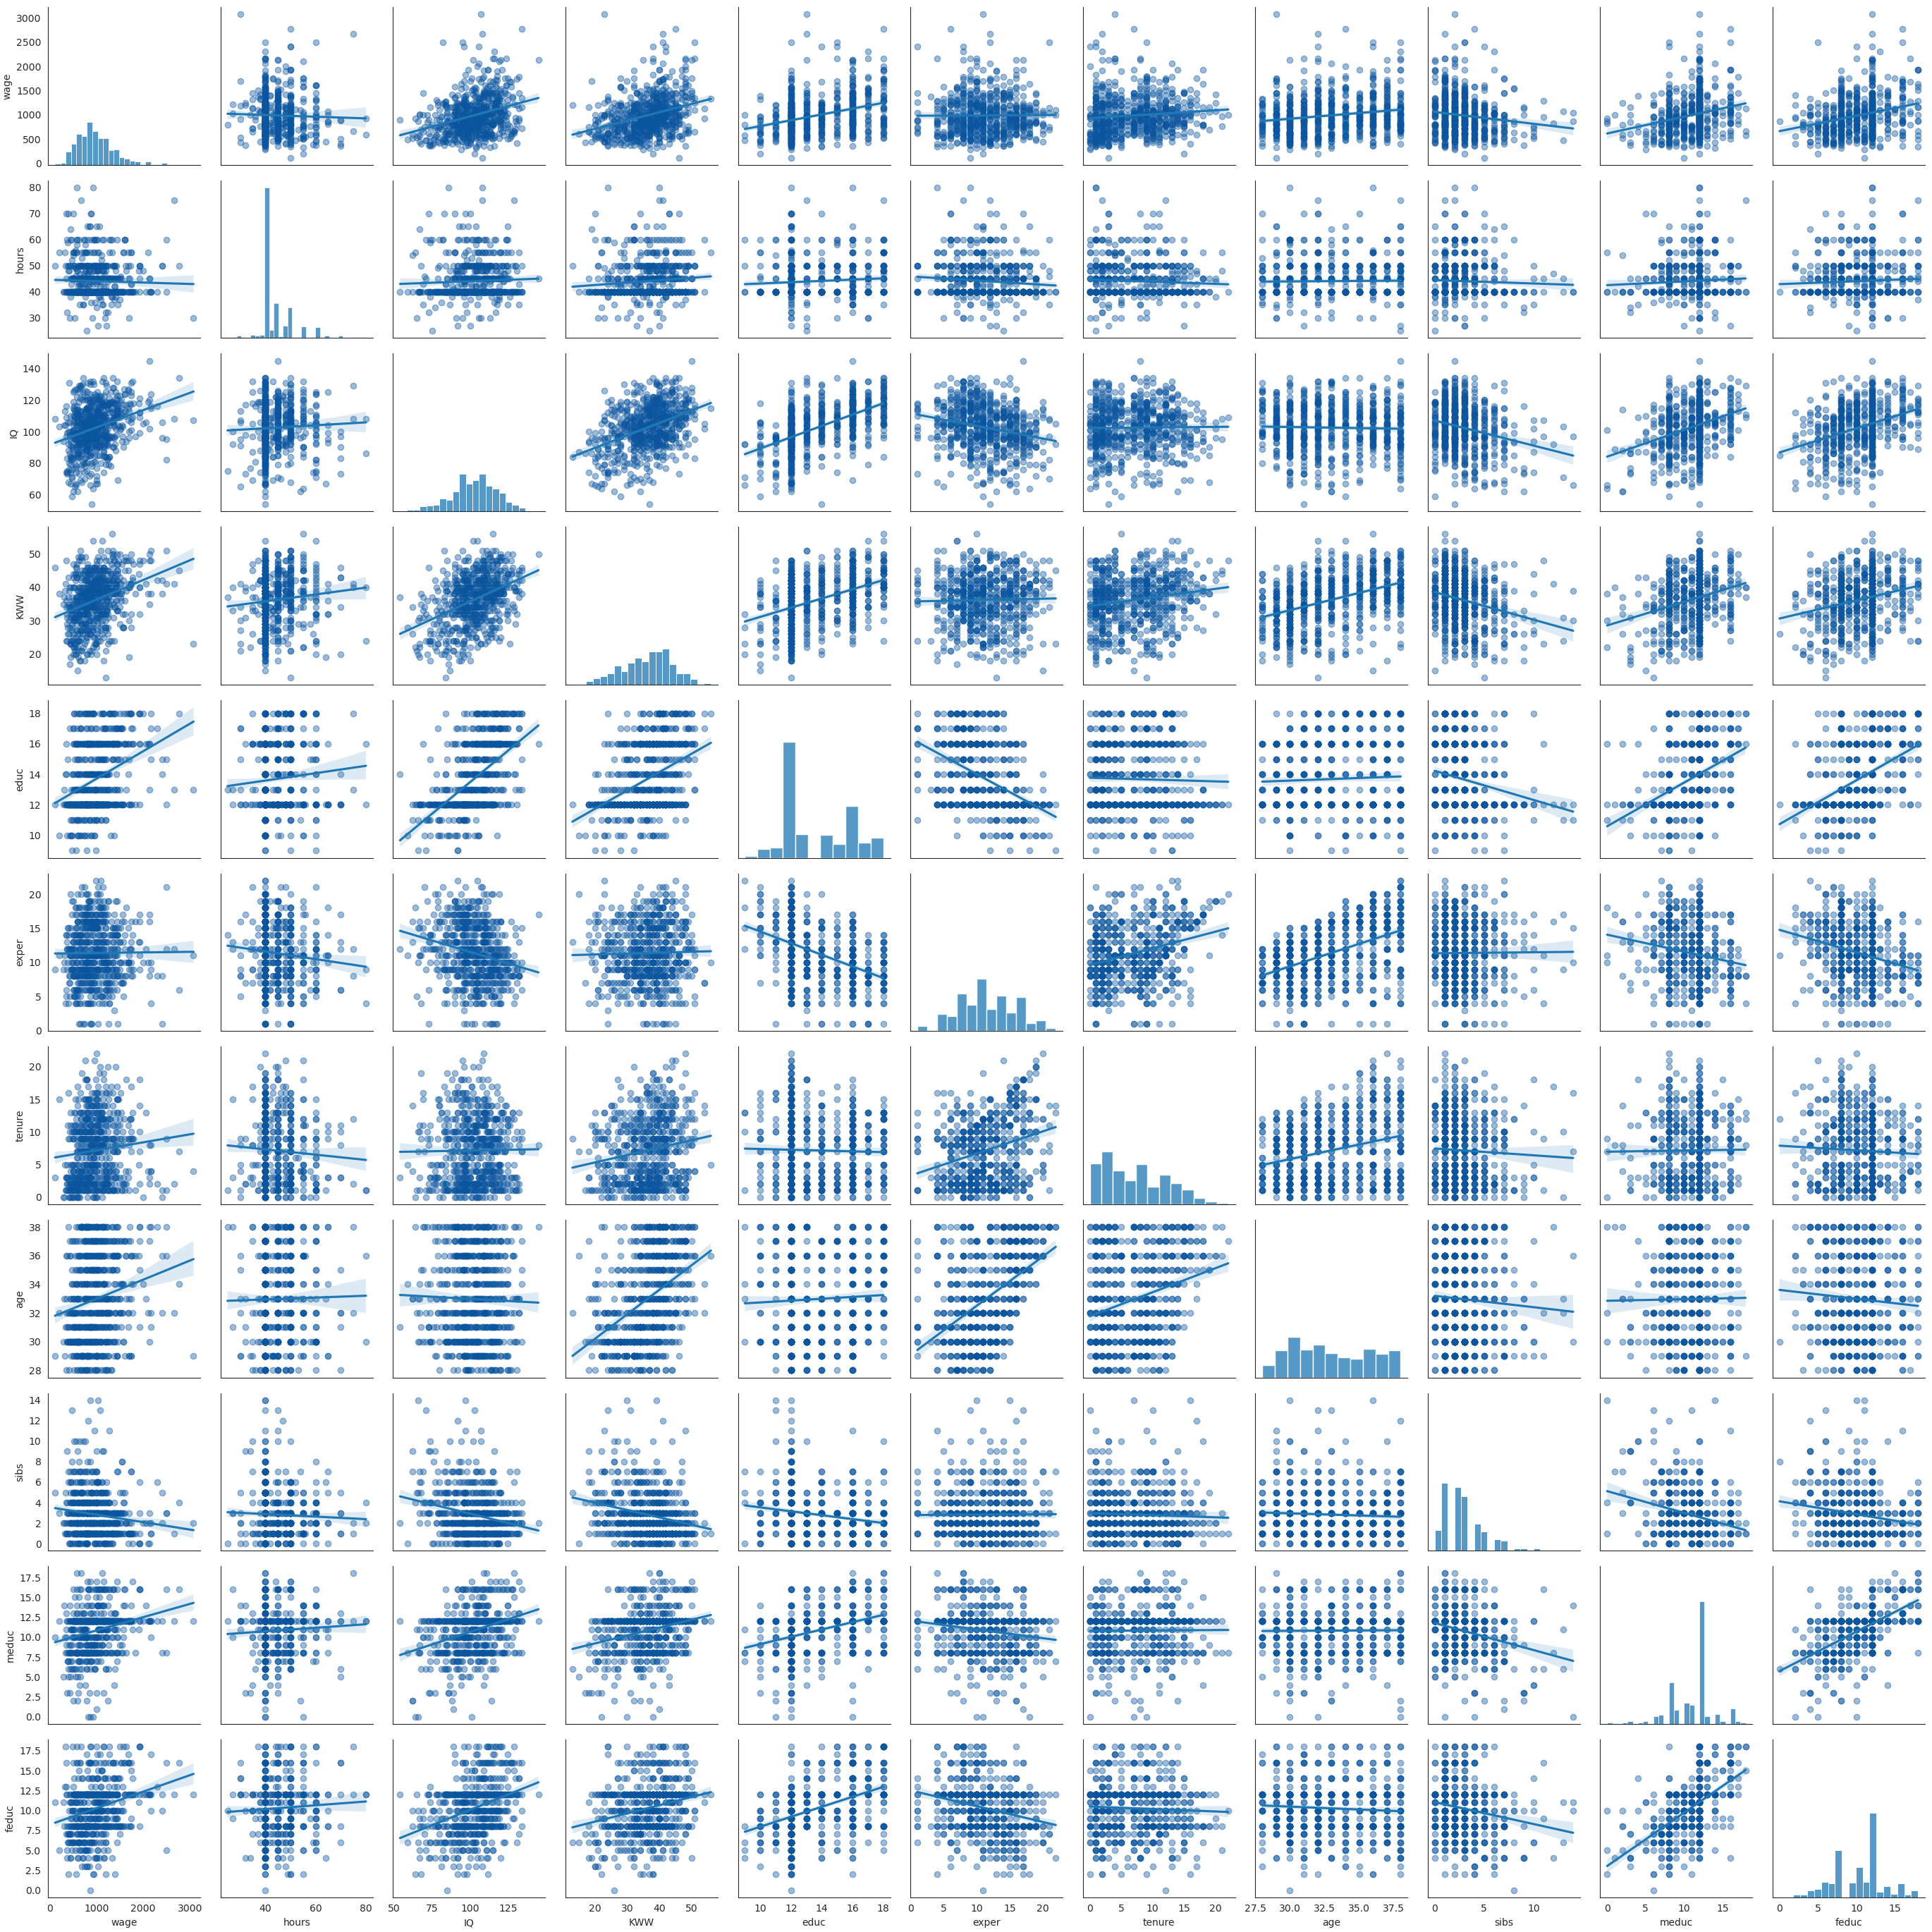

In [17]:
numerical_variables = ['wage','hours', 'IQ','KWW','educ','exper','tenure','age', 'sibs', 'meduc','feduc']
with sns.axes_style('white'):
    g=sns.pairplot(data[numerical_variables], kind='reg',
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()

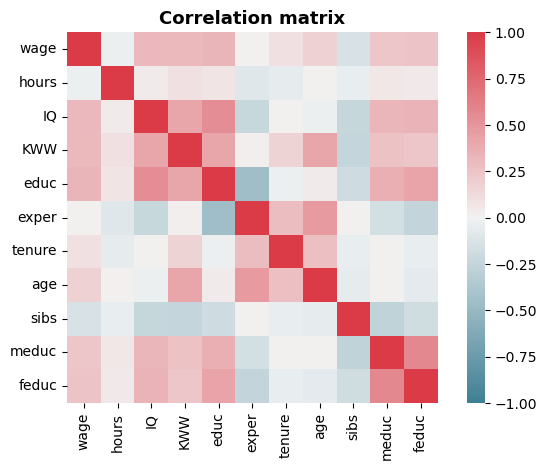

In [18]:
fig, ax = plt.subplots()
numerical_variables = ['wage','hours', 'IQ','KWW','educ','exper','tenure','age', 'sibs', 'meduc','feduc']
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[numerical_variables].corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()

In [19]:
data[numerical_variables].corr().round(2)

,wage,hours,IQ,KWW,educ,exper,tenure,age,sibs,meduc,feduc
wage,1.00,-0.03,0.30,0.32,0.33,0.01,0.10,0.18,-0.13,0.24,0.26
hours,-0.03,1.00,0.05,0.10,0.08,-0.09,-0.06,0.02,-0.04,0.06,0.05
IQ,0.30,0.05,1.00,0.41,0.55,-0.23,0.01,-0.03,-0.24,0.33,0.34
KWW,0.32,0.10,0.41,1.00,0.41,0.02,0.17,0.42,-0.24,0.27,0.24
educ,0.33,0.08,0.55,0.41,1.00,-0.45,-0.03,0.05,-0.19,0.36,0.42
exper,0.01,-0.09,-0.23,0.02,-0.45,1.00,0.29,0.48,0.01,-0.16,-0.26
tenure,0.10,-0.06,0.01,0.17,-0.03,0.29,1.00,0.27,-0.05,0.01,-0.05
age,0.18,0.02,-0.03,0.42,0.05,0.48,0.27,1.00,-0.06,0.01,-0.07
sibs,-0.13,-0.04,-0.24,-0.24,-0.19,0.01,-0.05,-0.06,1.00,-0.27,-0.19
meduc,0.24,0.06,0.33,0.27,0.36,-0.16,0.01,0.01,-0.27,1.00,0.58


Clear positive exist relationships between Wage and IQ, KWW, Educ, Feduc, and Meduc. Wage also seem to increase in variance with each of these variables. On the other hand, Sibs showed a negative relationship with Wage, while Exper showed nearly no relationship. Moreover, we can see that Sibs have a negative relationship with every numeric variable, expect for Exper

In terms of relationships between the predictors, Meduc and Feduc showed perfectly positive relationship with correlation equal to 1. This represent the perfect-collinearity problem. Hence, it is possible to drop one of the 2 variables to avoid perfect collinearity. In this case, we drop Feduc.

Considering the relationships between other predictors, we can see that their are positive relationships between Educ and IQ, Educ and KWW, Age and KWW, Exper and Age, IQ and KWW. We can also see clear negative relationships between Educ and Exper, which makes sense as people who start working early would have less chance to purse higher level education, and vice versa. Whilst these suggest moderate to fairly strong correlations between the predictors, none are too strong or high enough to cause any problems at this stage, except for the Meduc and Feduc case. Hence, multi-collinearity doesn't appear to be a big issue here.

# Task 2

Analyse the relationship between educ and exper, and wage. Include a discussion of
whether the assumptions of your analysis and test could hold for this data and whether
and how strongly the data actually fits the model.

### Fitting the Model

To analyze the relationship between the Educ and Exper, and Wage, we fit a MLR predicting the Wage with Educ and Exper as independent variables.

In [20]:
reg = smf.ols(formula='wage ~ educ + exper', data=data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     52.54
Date:                Mon, 13 May 2024   Prob (F-statistic):           7.02e-22
Time:                        21:58:24   Log-Likelihood:                -4817.2
No. Observations:                 655   AIC:                             9640.
Df Residuals:                     652   BIC:                             9654.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -264.7533    128.576     -2.059      0.040    -517.226     -12.281
educ          76.0859      7.425     10.248      0.000      61.507      90.665
exper         18.5773      3.893      4.772      0.000      10.934      26.221
==============================================================================
Omnibus:                      155.671   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.722
Skew:                           1.179   Prob(JB):                     3.60e-93
Kurtosis:                       6.169   Cond. No.                         157.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Result Interpretation

The result of the regression model showed that both Educ and Exper have a positive relationship with Wage. The effects of each variable can be summarized as:

1. Keeping the years of work experience constant, an increase of 1 year of education is associated with an average increase in the wage of 76.0859 dollars.
2. Keeping the years of education constant, an increase of 1 year of work experience is associated with an average increase in the wage of 18.5773 dollars.

According to the exploratory analysis, we could see that Exper nearly have no relationship with Wage. However, by accounting for the Educ variable, Exper changes to have a positive partial effect on Wage. 

### Assess the goodness of fit

To assess how strong the data fits the model, we examine the $R^2, R^2_{adj}, SER, \text{and}\ VIF$

In [21]:
resid=reg.resid
fit=reg.fittedvalues
reg.mse_resid**0.5

379.1209595080155

In [22]:
data[['educ','exper']].corr()

,educ,exper
educ,1.000000,-0.446211
exper,-0.446211,1.000000


In [23]:
VIF = 1/(1-0.446211**2)
VIF

1.248601966163678

The model has $R^2 = 0.139$, $R^2_{adj} = 0.136$ and SER = $379.12$ dollars.

The full model captures about $14\%$ of the variation in house prices, with a typical prediction error of about $\$380$. This shows that the model is not a strong fit to the data. This could be because of the OVB problem, as there were several potential relationships between the predictors examined in the exploratory analysis. This suggest that there should be a better model set that have a better fit to the data.

The variance inflation equal 1.2486. This is not a large number -- the usual threshold for the presence of a multicollinearity problem is 5. Hence, variance inflation is not a problem. 

### F-test

Next, we can conduct the f-test that at least one of the numerical predictor, Educ and Exper, is linearly related to Wage

In [24]:
hypothesis = 'educ = exper = 0'
f_test = reg.f_test(hypothesis)
print(f_test)

<F test: F=52.5351127838335, p=7.019819921436499e-22, df_denom=652, df_num=2>


The hypotheses here are:

$H_0: \,\, \beta_1 = \beta_2 = 0$

$H_1: \,\, $ at least one of $\beta_1, \beta_2$ $\neq 0$

I choose $\alpha=0.05$ as standard. The test statistic is $F_{stat} = 52.54$ which follows an $F_{2,n-3} = F_{2, 652}$ distribution under the null hypothesis. The p-value is $P(F_{2, 652} > 52.54) = 7.02 \times 10^{-22} \approx 0$. Since the p-value $< 0.05$ we reject the null and conclude that at least one of the numerical predictors is significantly linearly related to Wage.

### Assessing OLS Assumptions in MLR

To assess the assumptions of the OLS MLR model, we conduct the following plots:

1. Residuals vs fitted values plot
2. Residuals squared vs fitted values plot
3. Residuals vs Educ plot
4. Residuals vs Exper plot

Text(0.5, 1.0, 'Residuals vs fitted values plot')

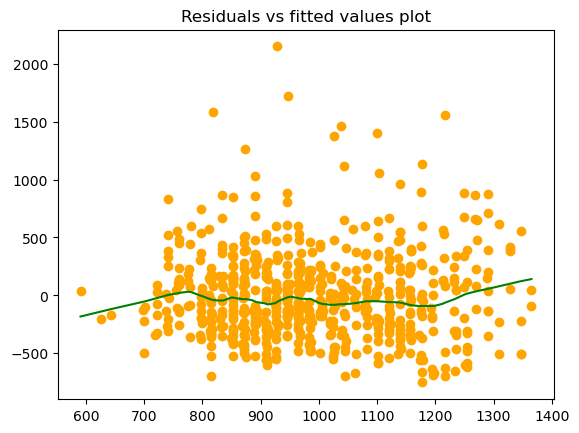

In [25]:
lowess = sm.nonparametric.lowess
plt.scatter(fit,resid, color='orange')
z1 = lowess(resid, fit, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'green')
plt.title('Residuals vs fitted values plot')

Text(0.5, 1.0, 'Educ vs residuals')

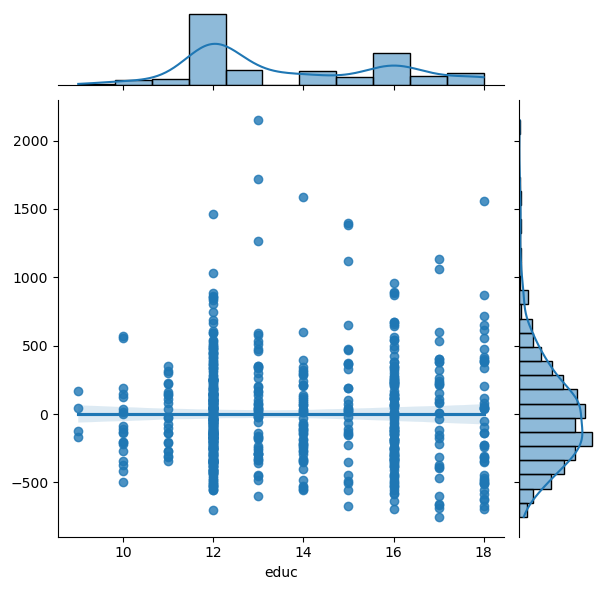

In [26]:
sns.jointplot(x=data['educ'], y=reg.resid, kind='reg')
ax.set_xlabel('educ')
ax.set_ylabel('Residuals')
ax.set_title('Educ vs residuals')

Text(0.5, 1.0, 'Exper vs residuals')

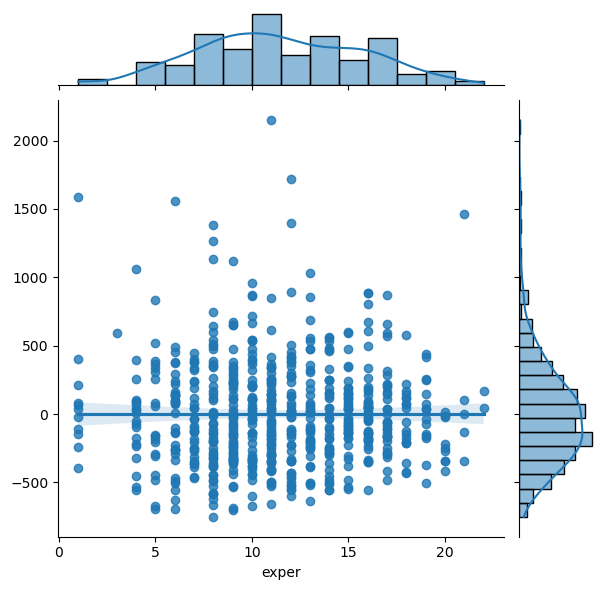

In [27]:
sns.jointplot(x=data['exper'], y=reg.resid, kind='reg')
ax.set_xlabel('exper')
ax.set_ylabel('Residuals')
ax.set_title('Exper vs residuals')

### Assessing OLS Assumptions in MLR

1. Linearity: $Y = \beta_0 + \beta_1 X_{1} + \beta_2 X_{2} + \varepsilon$ is the true population linear model.

The residuals vs fitted values plot shows no clear pattern in mean, as the errors seem to average close to 0 for most fitted values, as confirmed by the LOWESS curve, except for the very high and low wage individuals, where residuals can be positive and negative. The residuals vs each predictor show that $E(e|X)=0$ seems well satisfied for most $X$ values. Thus, the linear model seems a good choice for the Wage data.


2. Exogeneity of $E(\varepsilon | X_{1}, X_{2})$ $=0$

LSA 2 says that $E(\varepsilon | X) = 0$. This is not likely to be true, since the dataset likely contains some omitted variables. For example, according to the exploratory analysis, variables such as IQ and KWW could potentially be strong predictors of Wage. Also, there are clear positive relationships between Educ and IQ, Educ and KWW, and Exper and Age. Thus, these variables could potentially cause OVB in this model


3. Independence: 

The variables did not display any clear trends in their boxplots and histograms in the exploratory analysis, and are uncorrelated. Therefore, Assumption 3 is satisfied as the data give no strong or clear indication that it is not satisfied.

4. 4th moment of X exists: 

LSA 4 is about finite 4th moments. Both the years of education and years of work experience have natural and physical limits: thus they are bounded and automatically have finite 4th moments. Wage has a few outliers spotted from the boxplot. However, these outliers would not be strong enough, and therefore, Wage should has finite 4th moments too.

5. No perfect collinearity

LSA 5 is that there should be no prefect collinearity among the two variables in this MLR. We can see this is satisfied since their correlation is only $-0.45 << 1$.

6. Constant error variance (for f-test)

The residual plots show that the variance in Wage is constant, as the errors seem to average close to 0 for most fitted values. Hence, LSA 6 is satisfied. 

# Task 3

Discuss which variables in the dataset could be causing omitted variable bias in your analysis in task 2, and justify clearly why you think that. Include these omitted variables, together with educ and exper, in an MLR model, without any transformations or interactions or nonlinear effects; then fit the model. Again, test for a relationship of wage with education and exper. Also include a discussion of whether the assumptions of your test could hold for this data and whether and how well the data actually fits the model. Also discuss whether multicollinearity is a problem.

### Variables causing OVB

According to the exploratory analysis, we think that these following variables could be causing OVB in task 2: 

**1. IQ**

IQ has a clear positive correlation with Wage, which is reasonable because individuals with higher IQs may have better job opportunities and higher earning potential. Moreover, IQ have clear positive relationship with Educ, as people with higher education level would likely to have higher IQ. 


**2. KWW**

KWW has a clear positive correlation with Wage, as the KWW score measures the practical knowledge and skills that are relevant to employment. KWW also have a positive relationship with Educ, as people who with higher education levels are able to approach better knowledge about preparing for the workplace. 


**3. Age**

Age has a moderate positive correlation with Wage and clear positive relationship with Exper. This is reasonable as older individuals may command higher salaries due to their experience and expertise.


**4. Married**

This variable could impact wages due to potential differences in household responsibilities and financial stability between married and unmarried individuals.


**5. Urban**

Urban areas often offers higher wages than remote areas due to differences in cost of living and demand for specific skills.


**6. Black**

Race can unfortunately play a role in wage disparities due to systemic biases and discrimination in the US labor market.

### Fitting the Improved Model 

Hence, we refit the MLR model predicting Wage with these variables. We call this the Improved Model

In [28]:
reg2 = smf.ols(formula='wage ~ educ + exper + IQ + KWW + age + married + urban + black', data=data).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     25.01
Date:                Mon, 13 May 2024   Prob (F-statistic):           1.10e-33
Time:                        21:58:24   Log-Likelihood:                -4777.8
No. Observations:                 655   AIC:                             9574.
Df Residuals:                     646   BIC:                             9614.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -867.0554    201.739     -4.298      0.000   -1263.199    -470.912
educ          45.4757      8.867      5.129      0.000      28.064      62.887
exper         10.8362      4.441      2.440      0.015       2.116      19.556
IQ             3.6079      1.239      2.912      0.004       1.175       6.041
KWW            4.7424      2.408      1.969      0.049       0.013       9.472
age            8.6572      6.083      1.423      0.155      -3.289      20.603
married      175.6917     47.297      3.715      0.000      82.817     268.566
urban        184.0485     31.632      5.818      0.000     121.935     246.162
black       -102.9641     55.827     -1.844      0.066    -212.589       6.661
==============================================================================
Omnibus:                      175.105   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              591.937
Skew:                           1.242   Prob(JB):                    2.90e-129
Kurtosis:                       6.939   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Result Interpretation

The effect of each variables can be summarize as: 

1. Keeping all other variables constant, an increase of 1 year of education is associated with an average increase in Wage of 45.48 dollars.

2. Keeping all other variables constant, an increase of 1 year of work experience is associated with an average increase in Wage of 10.84 dollars.

3. Keeping all other variables constant, an increase of 1 IQ score is associated with an average increase in Wage of 3.61 dollars.

4. Keeping all other variables constant, an increase of 1 KWW score is associated with an average increase in Wage of 4.74 dollars.

5. Keeping all other variables constant, an increase of 1 age in years is associated with an average increase in Wage of 8.66 dollars.

6. Keeping all other variables constant, a married individual would have a higher Wage of 175.7 dollars compared to a unmarried individual

7. Keeping all other variables constant, an individual living in the urban area would have a higher Wage of 184.05 dollars compared to an individual who does not

8. Keeping all other variables constant, a black individual would have a lower Wage of 102.96 dollars compared to a individual with another race


With these effect, we can see that the positive effect of Educ on Wage has significantly reduced from 76.08 to 45.48. The positive effect of Exper also reduced, however, at a lower rate, from 18.58 to 10.84. This represent that the inclusion of additional variables in the improved model provided more accurate Educ and Exper coefficients, presenting more accurate relationships between these variables and Wage.



In [29]:
hypothesis = 'educ = exper = IQ = KWW = age = married = urban = black = 0'
f_test = reg2.f_test(hypothesis)
print(f_test)

<F test: F=25.00997946364447, p=1.104474339313258e-33, df_denom=646, df_num=8>


### Assess the Improved Model's goodness of fit 

To assess how strong the data fits the model, we examine the $R^2, R^2_{adj}, \text{and}\$  SER. 

In [30]:
resid2=reg2.resid
fit2=reg2.fittedvalues
reg2.mse_resid**0.5

358.6247063323515

The previous model has SER = $379.12$ dollars and $R^2_{adj} = 0.136$. The improved model has SER = $357.15$ dollars and $R^2_{adj} = 0.227$. Clearly both models are quite weak fits to the data, but the improved model is a much stronger fit.

### Assessing OLS Assumptions in MLR

To assess the assumptions of the OLS MLR model, we conduct the following:

1. Residuals vs Fitted Values LOESS plot
2. The full model with every possible variables 

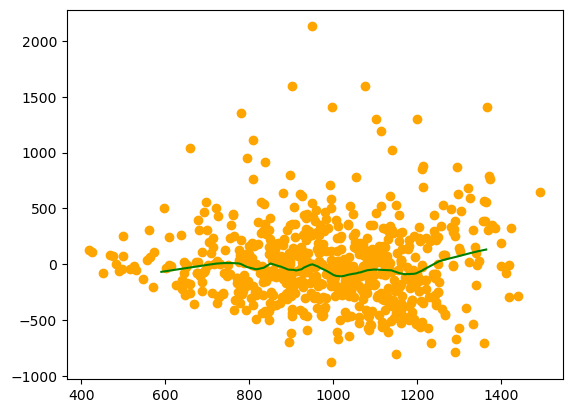

In [31]:
lowess = sm.nonparametric.lowess
plt.scatter(fit2,resid2, color='orange')
z1 = lowess(resid2, fit, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'green')

In [32]:
fullreg = smf.ols(formula='wage ~ hours + educ + exper + IQ + KWW + tenure + age + married + black + south + urban + sibs + brthord + meduc', data=data).fit()
fullreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     15.58
Date:                Mon, 13 May 2024   Prob (F-statistic):           8.09e-33
Time:                        21:58:24   Log-Likelihood:                -4770.1
No. Observations:                 655   AIC:                             9570.
Df Residuals:                     640   BIC:                             9637.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -667.8562    229.679     -2.908      0.004   -1118.873    -216.840
hours         -4.2256      1.975     -2.140      0.033      -8.104      -0.347
educ          41.3573      8.975      4.608      0.000      23.734      58.981
exper          9.5181      4.518      2.106      0.036       0.645      18.391
IQ             3.0516      1.247      2.447      0.015       0.603       5.501
KWW            4.7231      2.435      1.939      0.053      -0.059       9.505
tenure         2.5388      2.980      0.852      0.395      -3.313       8.391
age            8.3161      6.092      1.365      0.173      -3.647      20.279
married      177.0852     47.073      3.762      0.000      84.649     269.521
black        -91.2387     57.731     -1.580      0.115    -204.604      22.126
south        -28.8937     31.429     -0.919      0.358     -90.610      32.822
urban        181.1402     31.759      5.704      0.000     118.775     243.505
sibs           8.9489      8.066      1.109      0.268      -6.891      24.789
brthord      -18.4645     11.977     -1.542      0.124     -41.984       5.055
meduc         12.2988      5.603      2.195      0.029       1.296      23.302
==============================================================================
Omnibus:                      194.422   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.299
Skew:                           1.346   Prob(JB):                    2.62e-159
Kurtosis:                       7.417   Cond. No.                     2.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Assessing OLS Assumptions in MLR

1. Linearity: 

The residuals vs fitted values plot shows no clear pattern in mean, as the errors seem to average close to 0 for most fitted values, as confirmed by the LOESS curve, except for the very high wage individuals, where residuals can be positive. Thus, the linear model seems a good choice for the Wage data.


2. Exogeneity:

LSA 2 says that $E(\varepsilon | X) = 0$. This is most likely to be true, as the estimated variable slopes in the full and improved model are relatively close to each other, suggesting that OVB is solved from the original model, and is not likely to appear in the improved model. 


3. Independence: 

The variables did not display any clear trends in their histograms in the exploratory analysis, and are uncorrelated. Therefore, Assumption 3 is satisfied as the data give no strong or clear indication that it is not satisfied.

4. 4th moment of X exists: 

LSA 4 is about finite 4th moments. All the numerical variables: wage, educ, exper, IQ, KWW, and age have natural and physical limits: thus they are bounded and automatically have finite 4th moments, as does the dummy variables urban, black, married.


5. No perfect collinearity

LSA 5 is that there should be no prefect collinearity among the variables in this MLR. This is clear, as the relationship between the variables are much smaller than 1, according to the exploratory analysis. 

6. Constant error variance (for f-test)

The residual plots show that the variance in Wage is constant, as the errors seem to average close to 0 for most fitted values. Hence, LSA 6 is satisfied. 

### Multicolinearity

Use corellation matrix, cal VIF for each

In [33]:
predreg = smf.ols(formula='educ ~ exper + IQ + KWW + age + married + urban + black', data=data).fit()
predreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     91.53
Date:                Mon, 13 May 2024   Prob (F-statistic):           2.02e-92
Time:                        21:58:25   Log-Likelihood:                -1229.1
No. Observations:                 655   AIC:                             2474.
Df Residuals:                     647   BIC:                             2510.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5317      0.884      3.997      0.000       1.797       5.267
exper         -0.2381      0.017    -13.748      0.000      -0.272      -0.204
IQ             0.0587      0.005     11.785      0.000       0.049       0.069
KWW            0.0553      0.010      5.288      0.000       0.035       0.076
age            0.1478      0.026      5.610      0.000       0.096       0.199
married       -0.2251      0.210     -1.074      0.283      -0.636       0.186
urban          0.1851      0.140      1.321      0.187      -0.090       0.460
black          0.5401      0.247      2.190      0.029       0.056       1.024
==============================================================================
Omnibus:                        0.831   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.923
Skew:                           0.073   Prob(JB):                        0.630
Kurtosis:                       2.888   Cond. No.                     1.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
data[['educ','exper', 'IQ', 'KWW', 'age', 'married', 'urban', 'black']].corr().round(2)

,educ,exper,IQ,KWW,age,married,urban,black
educ,1.00,-0.45,0.55,0.41,0.05,-0.05,0.10,-0.11
exper,-0.45,1.00,-0.23,0.02,0.48,0.09,-0.04,0.01
IQ,0.55,-0.23,1.00,0.41,-0.03,-0.01,0.06,-0.30
KWW,0.41,0.02,0.41,1.00,0.42,0.06,0.11,-0.23
age,0.05,0.48,-0.03,0.42,1.00,0.09,-0.01,-0.08
married,-0.05,0.09,-0.01,0.06,0.09,1.00,-0.04,-0.06
urban,0.10,-0.04,0.06,0.11,-0.01,-0.04,1.00,0.07
black,-0.11,0.01,-0.30,-0.23,-0.08,-0.06,0.07,1.00
